# Titanic: Machine Learning from Disaster
https://www.kaggle.com/c/titanic/data

Notebook Author: Chiu-Ming Lam  

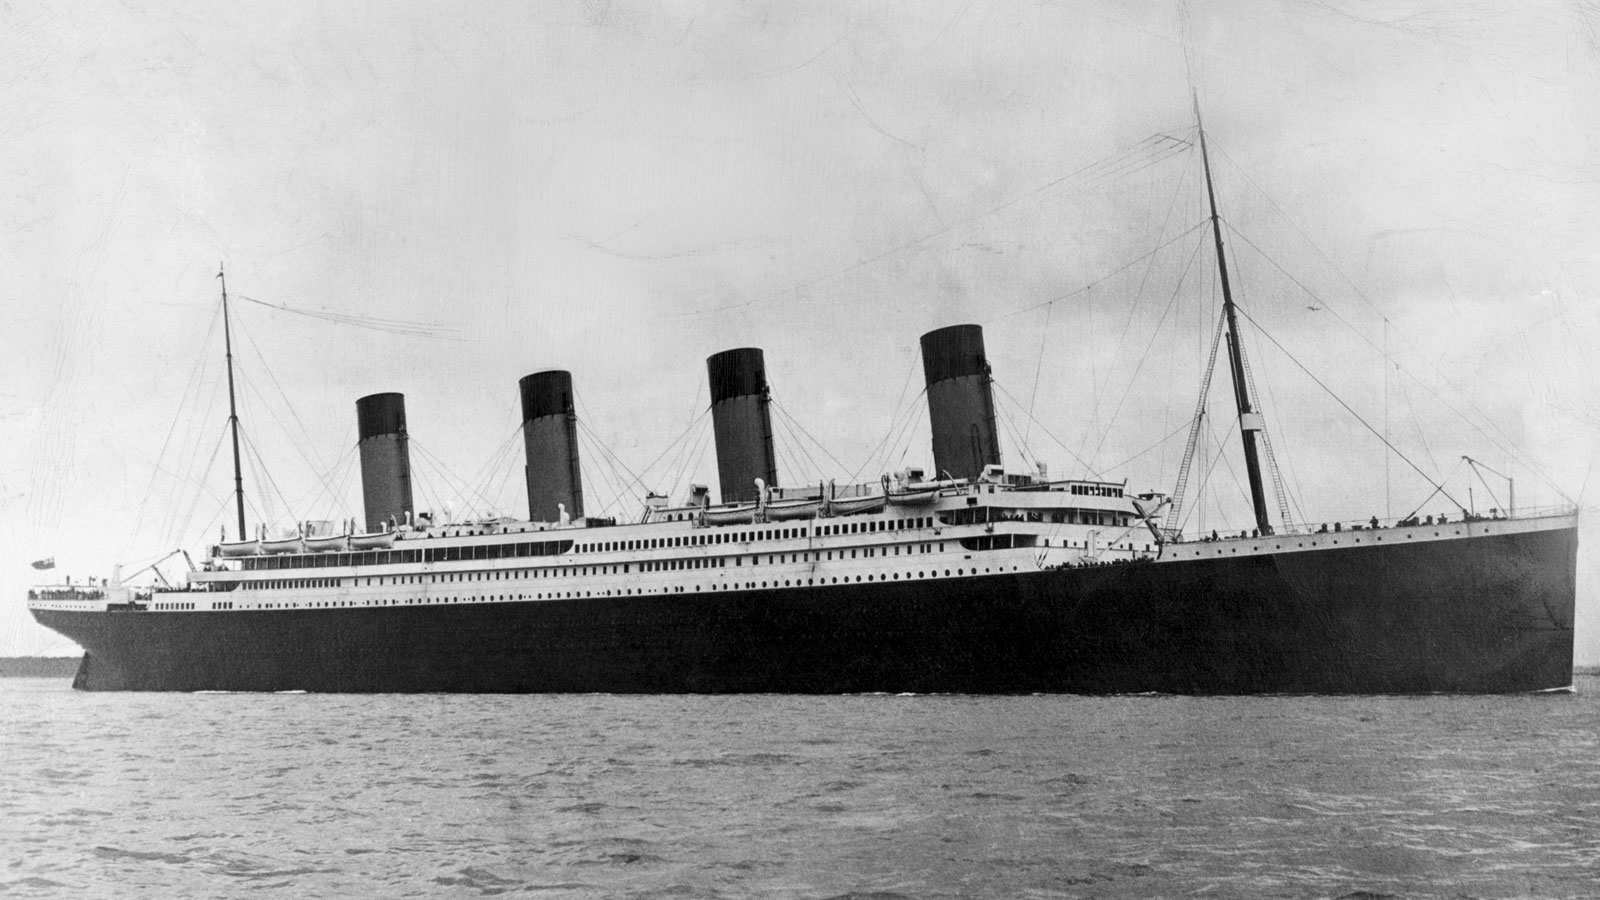

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In [1]:
# for data cleaning and analysis
import pandas as pd

# Importing the data

In [2]:
titanicTrainData = pd.read_csv('train.csv')
titanicTrainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Brief column descriptions:
1. Survived passenger is marked with value, 1, in the Survived column
2. There are three passenger classes: 1 = first class, 2 = second class, 3 = third class
3. SibSp refers to the number of siblings and spouses associated with a passenger
4. Parch refers to the number of parents and children associated with a passenger

In [3]:
titanicTrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Observations:
* There are 12 columns -- 11 features and 1 target (Survived)
* 5 object datatype columns; probably will need to convert to numeric type for fitting into algorithms later
    * Name
    * Sex
    * Ticket
    * cabin
    * embarked
* There seems to be some missing data in the 'Age','Cabin' and 'Embarked' column

*(investigating missing records...)*

In [4]:
titanicTrainData.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

# Observations:
* There's a lot of missing records in the 'Cabin' column; there's no way of re-completing the missing data; 
    * dropping the 'Cabin' column
* The 'PassengerId' column and the 'Ticket' column can be dropped as well since they are only random series of string and numbers 

In [5]:
titanicTrainData.drop(['Cabin','Ticket','PassengerId'],axis=1,inplace=True)

The columns with object datatype now remains the **'Sex'** column, the **'Embarked'** column, and the **'Name'** column
In addition:
* **'Age'** still has 177 missing records
* **'Embarked'** has 2 missing records

let's look at the distribution of the 'Age' data and decide if we should use the mean or median to fill the missing data

In [6]:
import seaborn as sns
sns.boxplot(titanicTrainData.Age, boxprops=dict(alpha=.8))

/home/eddie/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:53: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


there seems to be a good number of outliers, so using median would probably be a better choice

In [7]:
# filling the null data in the Age column with median of the existing data
titanicTrainData['Age'] = titanicTrainData['Age'].fillna(titanicTrainData['Age'].median())
titanicTrainData['Embarked'] = titanicTrainData['Embarked'].fillna(titanicTrainData['Embarked'].mode()[0])

In [8]:
titanicTrainData.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Now converting object type columns into numeric values/dummies...<br> 
converting the **Sex** and **Embarked** columns into dummies...

In [9]:
import sklearn as sl
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

titanicTrainData['Sex_code'] = le.fit_transform(titanicTrainData['Sex'])
titanicTrainData['Embarked_code'] = le.fit_transform(titanicTrainData['Embarked'])    

In [10]:
titanicTrainData

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_code,Embarked_code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,2
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,2
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,0,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,0,2
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,0


### Results:
Sex|Sex_code
:--|--- 
male| 1 |
female|0|


Embarked|Embarked_code
:--|---
C|0
Q|1
S|2

Double Checking...

In [11]:
titanicTrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
Sex_code         891 non-null int64
Embarked_code    891 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


# Exploring relationships amongst features and with target

In [12]:
pd.DataFrame(titanicTrainData.corr()['Survived'].abs().sort_values(ascending=False).round(3))

,Survived
Survived,1.000
Sex_code,0.543
Pclass,0.338
Fare,0.257
Embarked_code,0.168
Parch,0.082
Age,0.065
SibSp,0.035


# Observations:
We see that whether a passenger would survive mainly depends on his/her sex and his/her passenger class<br>

(The heatmap below further exposes the relationships amongst the features and with the target)

       Survived  Pclass     Age   SibSp   Parch    Fare  Sex_code  \
count    891.00  891.00  891.00  891.00  891.00  891.00    891.00   
mean       0.38    2.31   29.36    0.52    0.38   32.20      0.65   
std        0.49    0.84   13.02    1.10    0.81   49.69      0.48   
min        0.00    1.00    0.42    0.00    0.00    0.00      0.00   
25%        0.00    2.00   22.00    0.00    0.00    7.91      0.00   
50%        0.00    3.00   28.00    0.00    0.00   14.45      1.00   
75%        1.00    3.00   35.00    1.00    0.00   31.00      1.00   
max        1.00    3.00   80.00    8.00    6.00  512.33      1.00   

       Embarked_code  
count         891.00  
mean            1.54  
std             0.79  
min             0.00  
25%             1.00  
50%             2.00  
75%             2.00  
max             2.00  


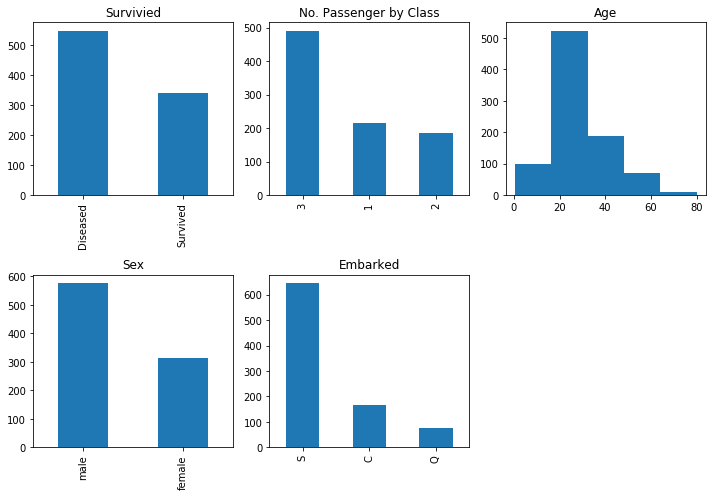

In [13]:
print(titanicTrainData.describe().round(2))

import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

plt.subplot(231)
titanicTrainData['Survived'].value_counts().plot(kind='bar')
plt.title('Survivied')
plt.xticks(list(range(2)),['Diseased','Survived'])

plt.subplot(232)
titanicTrainData['Pclass'].value_counts().plot(kind='bar')
plt.title('No. Passenger by Class')

plt.subplot(233)
plt.hist(bins=5, x = titanicTrainData['Age'])
plt.title('Age')

plt.subplot(234)
titanicTrainData['Sex'].value_counts().plot(kind='bar')
plt.title('Sex')

plt.subplot(235)
titanicTrainData['Embarked'].value_counts().plot(kind='bar')
plt.title('Embarked')

plt.tight_layout()

# Observations:
1. Based on the mean in Survived column, we see that most passengers in this dataset didn't survive
2. Based on the mean and percentiles in the Passenger Class column, we see that most passengers concentrate in the second class, and more in thrid class
3. The average age in of the passengers in this dataset is around mid 30
4. There were more male passengers than female passengers on the ship
5. Most people embarked on Southampton

(8.0, 0.0)

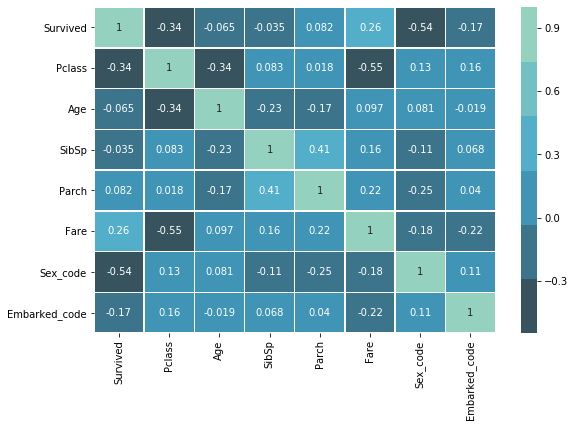

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(9,6))

sns.heatmap(titanicTrainData.corr(),annot=True,linewidths=.5,ax=ax,cmap=sns.color_palette("GnBu_d"))
# fixing the a bug between seaborn with matplotlib
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Further investigating our last observation<br>
that a passenger's survival highly depended on his/her sex and passenger class...

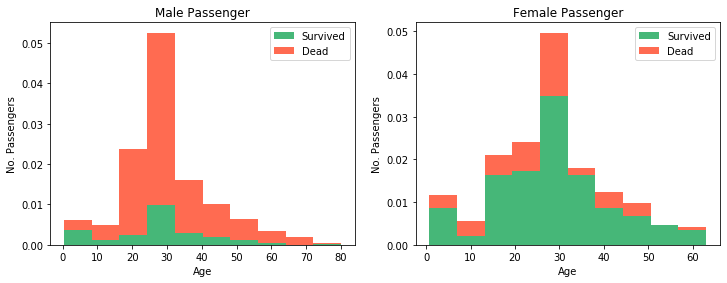

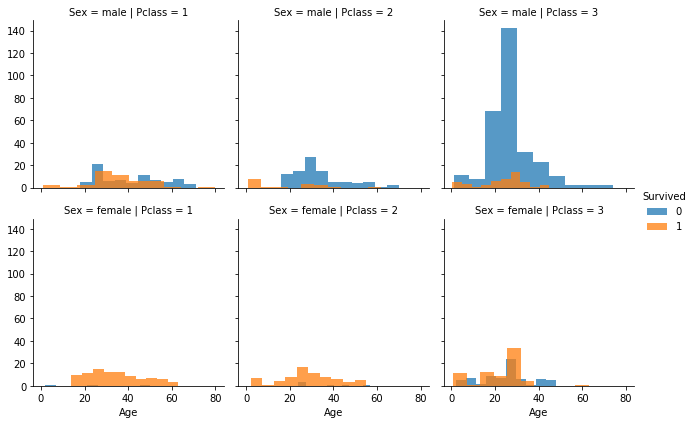

In [15]:
plt.figure(figsize=(12,9))

plt.subplot(221)
plt.hist(
    x = [titanicTrainData[(titanicTrainData.Sex_code == 1) & (titanicTrainData.Survived == 1)]['Age'],
 titanicTrainData[(titanicTrainData.Sex_code == 1) & (titanicTrainData.Survived == 0)]['Age']],
    stacked=True, color = ['mediumseagreen','tomato'],label = ['Survived','Dead'], alpha=0.95, density=1)
plt.legend()
plt.xlabel('Age')
plt.ylabel('No. Passengers')
plt.title('Male Passenger')

# female plot
plt.subplot(222)
plt.hist(
    x = [titanicTrainData[(titanicTrainData.Sex_code == 0) & (titanicTrainData.Survived == 1)]['Age'],
 titanicTrainData[(titanicTrainData.Sex_code == 0) & (titanicTrainData.Survived == 0)]['Age']],
    stacked=True, color = ['mediumseagreen','tomato'],label = ['Survived','Dead'], alpha=0.95, density=1)
plt.legend()
plt.xlabel('Age')
plt.ylabel('No. Passengers')
plt.title('Female Passenger');

# comparison by sex and pclass
h = sns.FacetGrid(titanicTrainData, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

/home/eddie/snap/jupyter/common/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


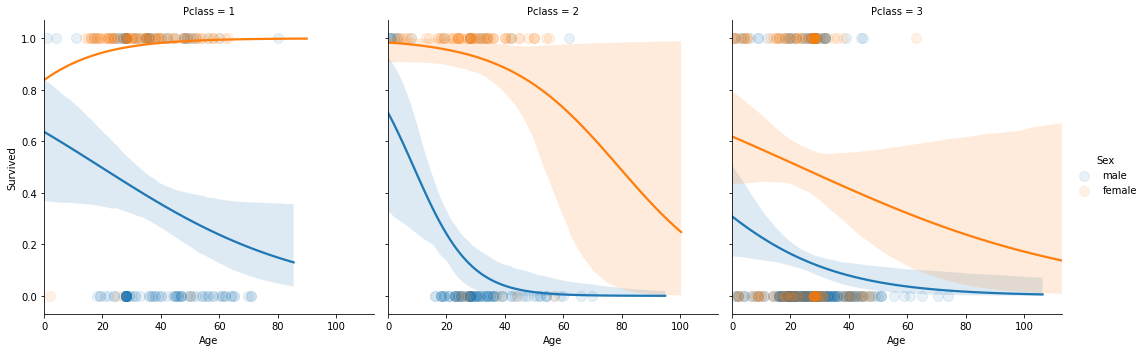

In [26]:
sns.lmplot(x = 'Age', y = 'Survived',data=titanicTrainData, col='Pclass',
           logistic=True,
           hue='Sex', scatter_kws={"s": 100, "alpha":0.1}).set(xlim=(0,None))

The first row of graphs compares the survival rate between sexes<br>
1. It they shows in this dataset female passengers are more likely to survive than male passengers 

The second row of graphs reveals the relationships between sexes and passenger class, and survival rate<br>
1. Amongst the first class passengers, women were more likely to survive, and their survival rate increases with age
2. Amongst the second class passengers, women were more likely to survive, but rate of survival decreases with the increase of age; the survival rate of second-class male passenger group decreases much more drastically with the increase of age, in comparison to female passenger group
3. **Third-class passengers' survival rate is much lower than the first and second class passenger groups, regardless of sex**. And like other passenger groups, the male passenger group has a much lower survival rate than the female group within the same passenger class. 

[Text(0.5, 0, 'Survival Rate')]

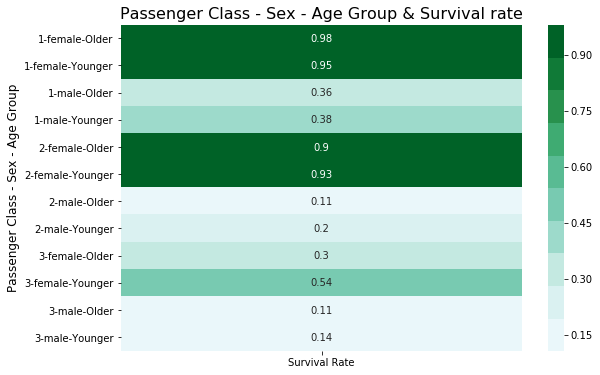

In [17]:
titanicTrainData['Age_Group'] = 'Younger'
titanicTrainData.loc[titanicTrainData.Age >30,'Age_Group'] = 'Older'

f, ax = plt.subplots(figsize=(9,6))

cmap = sns.color_palette("BuGn", 10)

sns.heatmap(pd.DataFrame(titanicTrainData.groupby(['Pclass','Sex','Age_Group']).mean().Survived),
           cmap = cmap,annot=True)

# fixing the a bug between seaborn with matplotlib
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Passenger Class - Sex - Age Group & Survival rate',fontsize=16)
ax.set_ylabel('Passenger Class - Sex - Age Group',fontsize=12)
ax.set_xticklabels(["Survival Rate"])

### The heatmap further demonstrates that the female passenger has the highest survival rate amongst all. In addition, the higher the passenger class of the passenger group, the higher the survival rate; Male passengers generally have a poorer survival rate.

# Modeling Data
Since this is a supervised, classification problem, I chose to apply following models
1. Logistic Regression
3. Decision Tree

Before building the models, though, some of the non numeric columns need to be dropped so that the algorithms fit more nicely...

In [18]:
titanicTrainData.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_code,Embarked_code,Age_Group
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,2,Younger
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0,Older
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,2,Younger
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,2,Older
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,2,Older


1. Change the 'Sex_code' column name to 'male' so that it's more intuitive
2. Breaking up the Embarked column into 2 distinct columns, for Q and S, with boolean value. (If neither column is True, that means the passenger is traveling to C)
3. Spliting up the Pclass column into 2 distinct columns, similarly to the way of the Embarked column 

In [19]:
embarked_d = pd.get_dummies(titanicTrainData['Embarked'],drop_first=True)
pclass_d = pd.get_dummies(titanicTrainData['Pclass'],drop_first=True)


titanicTrainData = pd.concat([titanicTrainData,pclass_d,embarked_d],axis=1)
titanicTrainData.rename(columns = {'Sex_code':'male'},inplace=True)
titanicTrainData

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,male,Embarked_code,Age_Group,2,3,Q,S
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,2,Younger,0,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0,Older,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,2,Younger,0,1,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,2,Older,0,0,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,2,Older,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,2,Younger,1,0,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,0,2,Younger,0,0,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,0,2,Younger,0,1,0,1
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,0,Younger,0,0,0,0


Isolating the data going into modeling...

In [55]:
data = titanicTrainData.drop(['Pclass','Name','Sex','Embarked','Embarked_code','Age_Group'],axis=1)
data.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Logistic Regression

In [56]:
# isolating the features and the target variables
X = data.drop(['Survived'],axis=1)
y = data['Survived']

train-test spliting the data into four-fold...

In [97]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

# import model builder
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
classifier = lr.fit(X_train,y_train)
# make prediction
lr_predictions = classifier.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy Score:', accuracy_score(y_test, lr_predictions))
print('ROC AUC Score:', roc_auc_score(y_test, lr_predictions))

Accuracy Score: 0.8071748878923767
ROC AUC Score: 0.7899671052631578


In [73]:
from sklearn.model_selection import GridSearchCV


params = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}

lrgrid = GridSearchCV(lr, param_grid=params, cv=50, scoring='roc_auc')
lrgrid.fit(X_train, y_train)

print(lrgrid.best_score_)
print(lrgrid.best_params_)

0.8596245009980041
{'C': 0.615848211066026, 'penalty': 'l1', 'solver': 'liblinear'}


/home/eddie/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [103]:
lr = LogisticRegression(penalty='l1',solver='liblinear', C=0.615848211066026)
lrclassifier = lr.fit(X_train, y_train)
lr_predictions = lrclassifier.predict(X_test)

In [104]:
from sklearn.metrics import accuracy_score, roc_auc_score
print('Accuracy Score:', accuracy_score(y_test, lr_predictions))
print('ROC AUC Score:', roc_auc_score(y_test, lr_predictions))

Accuracy Score: 0.8116591928251121
ROC AUC Score: 0.7952302631578947


# The Logistic Formula

In [122]:
print('Intercept:',lr.intercept_[0])
print()
print(pd.DataFrame(list(X.columns),list(lr.coef_), columns=['Predictor']))

Intercept: 3.2819098228032155

          Predictor
-0.034907       Age
-0.335115     SibSp
 0.000596     Parch
 0.004134      Fare
-2.489990      male
-0.372604         2
-1.723645         3
 0.000000         Q
-0.399922         S


# Decision Tree

In [101]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(random_state=1)
decision_tree_ = decision_tree.fit(X_train,y_train)
tree_predictions = decision_tree.predict(X_test)

In [102]:
print('Accuracy Score:', accuracy_score(y_test, tree_predictions))
print('ROC AUC Score:', roc_auc_score(y_test, tree_predictions))

Accuracy Score: 0.726457399103139
ROC AUC Score: 0.71015625


## Using Grid Search Cross Validation to look for best hyper-parameters...

In [77]:
import numpy as np
params = {
    'criterion':['entropy','gini'],
    'max_depth':np.arange(3,15),
    'max_leaf_nodes':np.arange(3,15),
}
decision_tree = tree.DecisionTreeClassifier()
dtree_grid = GridSearchCV(decision_tree, param_grid=params, cv=50, scoring='roc_auc')
dtree_grid.fit(X_train, y_train)

print(dtree_grid.best_score_)
print(dtree_grid.best_params_)

0.8752619760479045
{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 14}


/home/eddie/snap/jupyter/common/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The Grid Search CV will be looking for best roc auc score here, since there's some level of imbalance in the label data -- there are more diseased passengers than survived. 

In [88]:
decision_tree = tree.DecisionTreeClassifier(random_state=1, criterion='gini',max_depth=4,max_leaf_nodes=14)
decision_tree_ = decision_tree.fit(X_train,y_train)
tree_predictions = decision_tree.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, tree_predictions))
print('ROC AUC Score:', roc_auc_score(y_test, tree_predictions))

Accuracy Score: 0.7892376681614349
ROC AUC Score: 0.7716282894736842


The grid search cv has inproved the decision tree quite significantly.

# Visualizing the tree

In [81]:
from IPython.display import Image  
from sklearn.tree import export_graphviz

export_graphviz(decision_tree, out_file='tree_titanic.dot',  
                filled=True, rounded=True,
                special_characters=False, feature_names = X.columns,class_names=y.name)


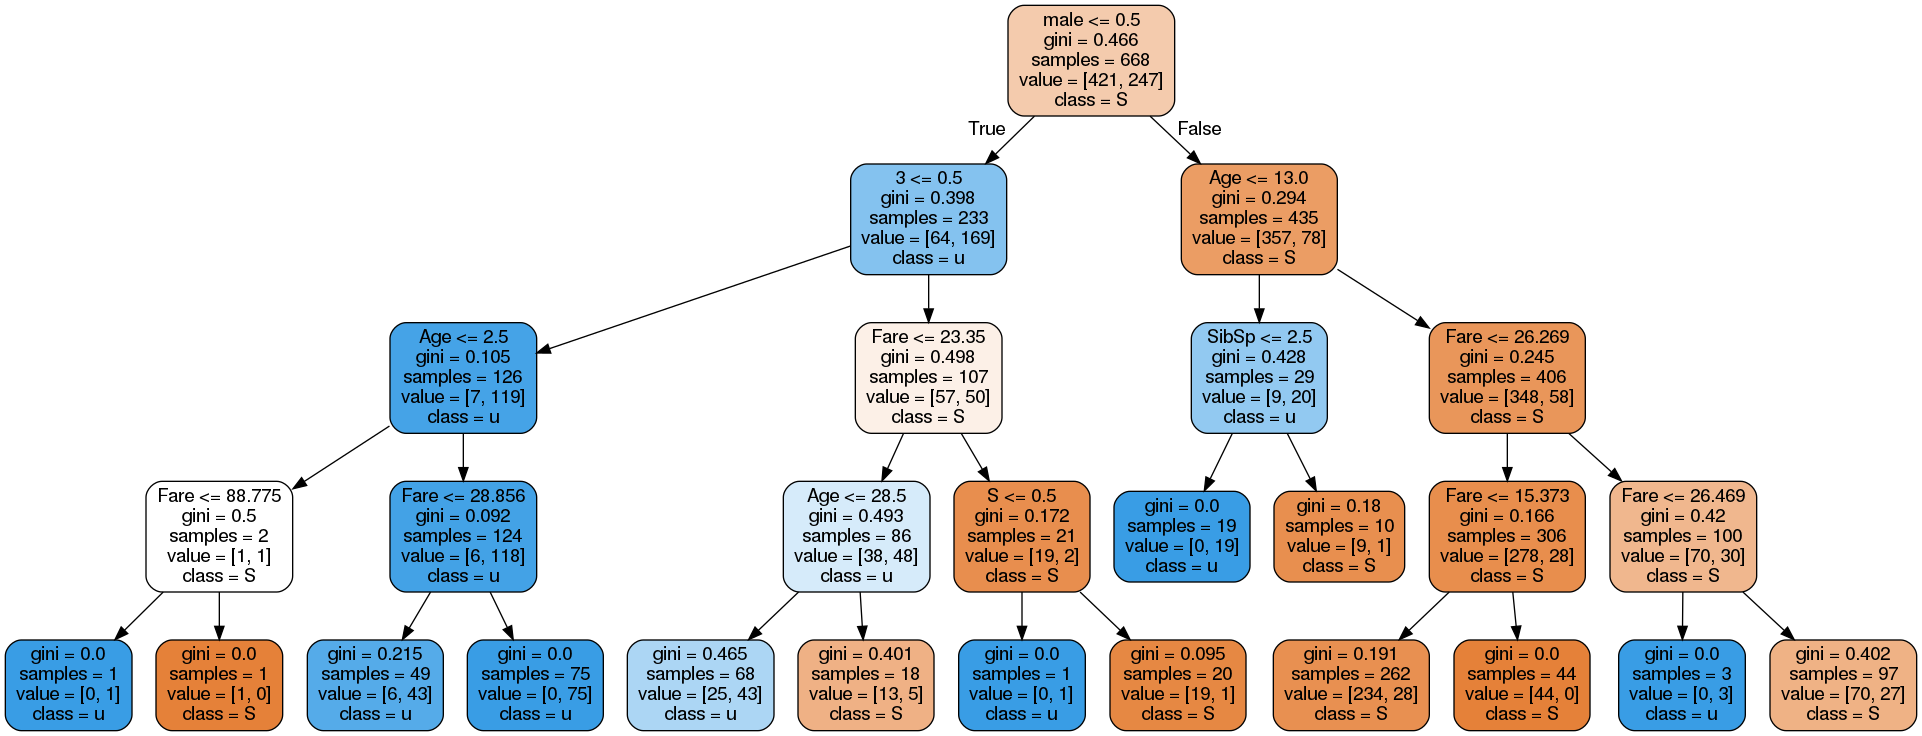

In [83]:
Image('tree_titanic.png')

# Comparing Models

In [105]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
#########################################################
lr_train_score = lr.score(X_train,y_train)

print('Logistic Regression Model Score:')
print('Acuracy Score with Training Data:',lr_train_score)
print()
print(classification_report(y_test,lr_predictions))
print('-'*80)
#########################################################
tree_train_score = decision_tree.score(X_train,y_train)

print('Decision Tree Model Score:')
print('Score with Training Data:',tree_train_score)
print()
print(classification_report(y_test,tree_predictions))
print('-'*80)


Logistic Regression Model Score:
Acuracy Score with Training Data: 0.8173652694610778

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       128
           1       0.84      0.68      0.76        95

    accuracy                           0.81       223
   macro avg       0.82      0.80      0.80       223
weighted avg       0.82      0.81      0.81       223

--------------------------------------------------------------------------------
Decision Tree Model Score:
Score with Training Data: 0.9895209580838323

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       128
           1       0.71      0.60      0.65        95

    accuracy                           0.73       223
   macro avg       0.72      0.71      0.71       223
weighted avg       0.72      0.73      0.72       223

--------------------------------------------------------------------------------


# Observations:
Althought the decision tree performs better on the training model than the logistic regression model, the Logistic regression model performs better with the testing data; in fact, the logistic model performs consistently on both the training and testing data.
So in general, the logistic model is more robust.

# Comparing models with confusion matrices 

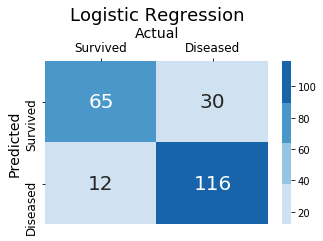

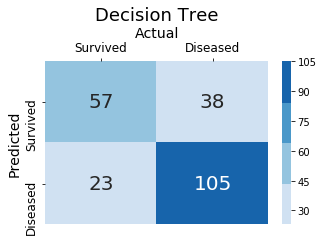

In [106]:
from sklearn.metrics import confusion_matrix
def graph_confusion_matrix(model_name,model_predictions):
    confusionMatrix = confusion_matrix(y_test,model_predictions)
    confusionMatrix_df = pd.DataFrame(confusionMatrix)
    confusionMatrix_df = confusionMatrix_df.iloc[::-1,::-1]

    confusionMatrix_df.columns = ['Survived','Diseased']
    confusionMatrix_df.index = ['Survived','Diseased']

    confusionMatrix_df.columns.name = 'Actual'
    confusionMatrix_df.index.name = 'Predicted'

    f, ax = plt.subplots(figsize=(5,3))

    cmap = sns.color_palette("Blues",4)

    sns.heatmap(confusionMatrix_df,
                annot=True,fmt='d',annot_kws={'fontsize':20},
               cmap=cmap)

    # fixing the a bug between seaborn with matplotlib
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    ax.set_title(model_name,fontsize=18)
    ax.set_ylabel('Predicted',fontsize=14)
    plt.yticks(fontsize=12)

    ax.set_xlabel('Actual',fontsize=14)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    plt.xticks(fontsize=12)

graph_confusion_matrix('Logistic Regression',lr_predictions)
graph_confusion_matrix('Decision Tree',tree_predictions)

# Observations:
Based on the confusion matrix, we can see that,again ,the logistic better (more correctly) classify cases in the testing data. 

---